# Stochastic Simulation of Chemical Reactions
**Prepared by:** Raghav Saxena (rsaxena@nd.edu) and Sarah Nano (snano@nd.edu)
**Edited by:** Tiago Thomaz Migliati Zanon (tmigliat@nd.edu)

**Reference:** [Chemical Reactor Analysis and Design Fundamentals by Rawlings et al. (Nob Hill Pub, LLC, 2002)](https://sites.engineering.ucsb.edu/~jbraw/chemreacfun/)

**Intended Audience:** This problem is intended for Chemical and Biomolecular Engineering juniors and seniors from the University of Notre Dame who are either enrolled in or have taken Reaction Engineering.


## Learning Objectives

After studying this notebook, completing the activities, and asking questions in class, you should be able to:

*   Understand stochastic simulations and how to use them to model chemical reactions.
*   Highlight similarities and differences between stochastic and deterministic rate models for chemical reactions.
*   Properly graph and visualize data using Matplotlib.
*   To solve differential equations related to reaction kinects problems numerically.

## Coding Resources
Relevant Modules in Class Website:

*   [Functions and Scope](https://ndcbe.github.io/data-and-computing/notebooks/01/Functions-and-Scope.html)
*   [Visualization with matplotlib](https://ndcbe.github.io/data-and-computing/notebooks/01/Matplotlib.html)
*   [Preparing Publication Quality Figures in Python](https://ndcbe.github.io/data-and-computing/notebooks/01/Publication-Quality-Figures.html)
*   [Euler Forward Method](https://ndcbe.github.io/data-and-computing/notebooks/07/Forward-and-Backward-Euler.html)
*   [Crank-Nicolson (Trapezoid Rule)](https://dcbe.github.io/data-and-computing/notebooks/07/Trapezoid-Rule.html)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction


Kinetic reactions are mostly modeled using deterministic rate laws, which involve solving nonlinear differential equations. Deterministic models work excellently with large systems involving many thousands of atoms.


However, in some cases, we might want to model systems with only a few hundred atoms, such as when modeling reactions at an interface or a catalyst surface. For such systems, the random behavior of the molecules becomes essential. Such systems can be modeled using random simulation techniques (also called kinetic Monte Carlo) which we explain later below in detail.

**The objectives of this exercise are:**

1. To perform random simulation on a two-reaction batch system using Gillespie algorithm.

2. Compare reaction profiles (concentrations vs time) from random simulation with those of deterministic rate laws.

3. Explore the effect of the number of molecules and rate constant on reaction profiles from the Gillespie algorithm.

4. Discuss similarities and differences between the rate law model and the random simulation model.

## 1a. Random Simulation - Gillespie Algorithm
In a random simulation, one can directly capture the random nature of molecules by using random molecular motion and probability of collision as the basis of reaction rates.

Through this exercise, we will highlight similarities and differences between a random simulation model and a deterministic model.

We will use the following two reaction constant volume batch system for the purpose of this exercise.
\begin{equation}
A \xrightarrow{k_1} B
\end{equation}
\begin{equation}
B \xrightarrow{k_2} C
\end{equation}

For stochastic (random) modeling, the systems are generally small and consist of about a few hundred molecules. Thus, we will model the system using the exact number of molecules instead of using concentrations. We will assume that these reactions are actual molecular events, i.e., a molecule of A converts to B in the first reaction, and a molecule of B converts to C in the second reaction.

Which reaction takes place is governed by their probabilities; this is proportional to the rate constant and the number of molecules as shown below:

\begin{equation}
r1 = k_1x_a
\end{equation}
\begin{equation}
r2 = k_2x_b
\end{equation}

These reaction probabilities look very similar to rate equations from the deterministic models. However, **x$_i$** is the number of component **$i$** molecules in the reactor volume, not concentration **C$_i$**.  

Given these reaction probabilities, we will simulate the random behavior of this reaction network using the Gillespie algorithm. The basic idea behind the Gillespie algorithm is to (i) randomly choose the time at which the next reaction occurs and (ii) randomly choose which reaction occurs at that time. The choice is not made completely randomly but rather using reaction probabilities. The following protocol describes the Gillespie algorithm:

1.   Initialize the number of starting molecules x$_i$ for each species in the reaction network.
2.   Compute total reaction probability, $r_{tot} = \sum r_ix_i$, it is intuitive that a higher total reaction probability would mean that the time to the next reaction is smaller.
3.   Select two random numbers, p1 and p2, from a uniform distribution on the interval (0,1).
4.   Compute the time to next reaction $\tau = -ln(p1)/r_{tot}$.
5.   Select the reaction that takes place at this time. The idea here is to partition interval (0,1) by relative sizes of individual reaction probabilities, then select the reaction that occurs using the randomly generated number p2.
6.   Update reaction time $t = t + \tau$  and adjust number of molecules x$_i$ for each species. For example, if reaction 1 is selected in step 5, we will reduce the number of A molecules by 1 and increase the number of B molecules by 1.
7.   Return to step 2 and continue until the total reaction probability is zero.

## 2. Random Simulation Model - Gillespie Algorithm
Complete the function "Gillespie" to perform stochastic simulation of the two reaction batch system.
\begin{equation}
A \xrightarrow{k_1} B
\end{equation}
\begin{equation}
B \xrightarrow{k_2} C
\end{equation}
**Write a pseudocode for the while loop to complete the code.**  Submit this answer on an attached pdf file.

In [10]:
def gillespie(k1, k2, A, B, C):
    """
    Function to implement Gillespie algorithm to perform stochastic simulation of the two reaction batch system

    Arguments:
    k1,k2: Reaction rate constants of the two reactions
    A,B,C: Initial number of A, B and C molecules

    Returns:
    y: A numpy array of simulation time and number of A, B and C molecules
    """
    # Random Simulation using Gillespie algorithm

    # Index counter
    n = 0

    # Initialize list for storing simulation time
    time = [0]

    # Initialize list for storing number of A, B and C molecules
    x_a = [A]
    x_b = [B]
    x_c = [C]

    # Total reaction probability at time t = 0
    r1 = k1 * x_a[0]
    r2 = k2 * x_b[0]
    rtot = r1 + r2

    while rtot != 0:
        ### BEGIN SOLUTION ###

        # Generating two random numbers from a uniform distribution between 0 and 1
        p = np.random.rand(2, 1)

        # Time to next reaction event using one of the two generated random numbers
        tau = -np.log(p[0, 0]) / rtot

        # Determining which reaction to take place at that time using other random number

        if p[1, 0] < r1 / rtot:
            # This means reaction A-->B takes place. Adjusting the number of molecules
            x_a.append(x_a[n] - 1)
            x_b.append(x_b[n] + 1)
            x_c.append(x_c[n])

        else:
            # This means reaction B-->C takes place. Adjusting the number of molecules
            x_a.append(x_a[n])
            x_b.append(x_b[n] - 1)
            x_c.append(x_c[n] + 1)

        # Update simulation time with tau every iteration
        time.append(time[n] + tau)

        # Update index counter
        n += 1

        # Update total reaction probability
        r1 = k1 * x_a[n]
        r2 = k2 * x_b[n]
        rtot = r1 + r2

    # Make a numpy array of simulation time, and number of A, B and C molecules.
    y = np.array([time, x_a, x_b, x_c])

    ### END SOLUTION ###

    return y

Initialize the number of molecules and rate constants in the next block and then run the Gillespie function. Plot the number of molecules of A, B, and C over time.

In [11]:
# Define initial number of molecules and rate constants

k1 = 0.5  # s-1
k2 = 1  # s-1
A = 1000
B = 0
C = 0

In [12]:
# Run gillespie function

x = gillespie(k1, k2, A, B, C)
time = x[0]
xa = x[1]
xb = x[2]
xc = x[3]

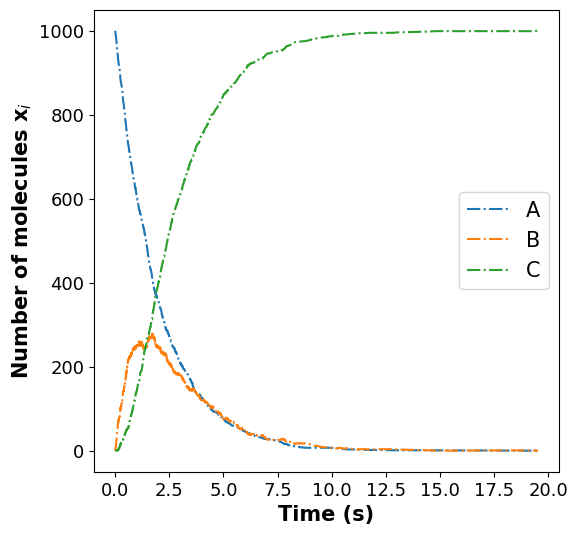

In [13]:
# Plot number of A, B and C molecules vs Simulation time

### BEGIN SOLUTION ###
fig = plt.figure(figsize=(6, 6))
plt.plot(time, xa, "-.", label=r"A")
plt.plot(time, xb, "-.", label=r"B")
plt.plot(time, xc, "-.", label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)
### END SOLUTION ###

## 3a. Deterministic Equations
A deterministic rate model for the same reaction network would result in the following rate expressions:
\begin{equation}
r1 = k_1C_a
\end{equation}
\begin{equation}
r2 = k_2C_b
\end{equation}

Where $C_i$ is the concentration of species $i$, unlike the number of molecules of the stochastic model.

**Using these rate laws, write down the differential equations for the concentration of each species.** Submit this answer on an attached pdf file.

**Answer:**
\begin{equation}
\frac{dC_a}{dt} = -k_1C_a
\end{equation}
\begin{equation}
\frac{dC_b}{dt} = k_1C_a - k_2C_b
\end{equation}
\begin{equation}
\frac{dC_c}{dt} = k_2C_b
\end{equation}

Note: These equations would be the same for the number of molecules, i.e., one can replace $C_i$ with $x_i$ in the differential equations above. Concentrations can be converted to the number of molecules using Avogadro's number $N_A$ and volume V of the reactor and these constants will cancel out in the equations.

## 3b. Deterministic Rate Model - Solving Differential Equations

**Solve the differential equations to find the analytical solution of the deterministic rate models.** Submit this answer on an attached pdf file. Add these solutions to the code below to plot these deterministic rate model profiles.

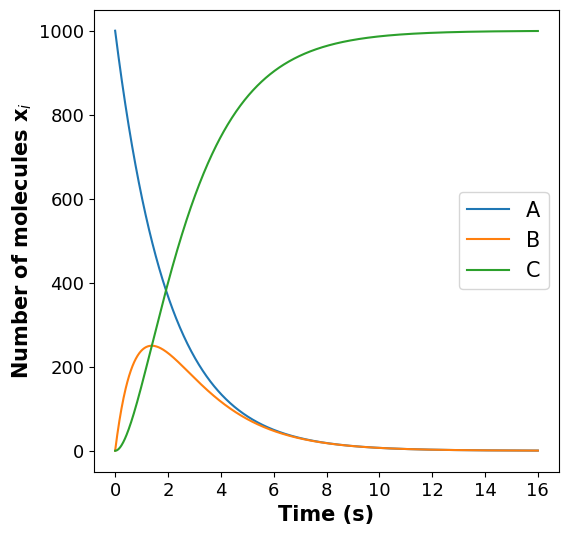

In [ ]:
# Analytical solution from solving differential equations of deterministic rate models
# These models were solved mathematically on paper and in this section we are just plotting the obtained solutions

t = np.linspace(0, 16, 1000)

X_a = xa[0] * np.exp(-k1 * t)

if k1 == k2:
    X_b = xa[0] * k1 * t * np.exp(-k1 * t)
    X_c = xa[0] * (1 + (k1**2) * (-t * (np.exp(-k1 * t) / k1) - (np.exp(-k1 * t) / k1**2)))

else:
    X_b = xa[0] * (k1 / (k1 - k2)) * (np.exp(-k2 * t) - np.exp(-k1 * t))
    X_c = xa[0] * (1 + (k1 * k2 / (k1 - k2)) * ((np.exp(-k1 * t) / k1) - (np.exp(-k2 * t) / k2)))

# Plot deterministic solution of number of A, B and C molecules vs time

### BEGIN SOLUTION ###
fig = plt.figure(figsize=(6, 6))
plt.plot(t, X_a, label=r"A")
plt.plot(t, X_b, label=r"B")
plt.plot(t, X_c, label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)
### END SOLUTION ###

## 3b-1. - Solving Differential Equations Numerically

What if instead of solving on paper the found differential equations we decided to do it numerically coding? Two simple alternatives could bring expressive results. They are the Forward Euler Method and the Crank-Nicolson (Trapezoid Rule).


## 3b-1.1 - Forward Euler Method

The Forward Euler Method is a numerical technique for approximating the solutions to ordinary differential equations (ODEs). It is well known to be a simple and straightforward method that's useful for solving ODEs when you can't find an exact analytical solution.

Basically, it approximates the solution to a first-order ordinary differential equation of the form:

\begin{equation}
\frac{dy}{dx} = f(x, y)
\end{equation}

The Forward Euler Method also works through an iterative approach that breaks down the continuous ODE into discrete steps, by using the following formula to update the solution at each step:

\begin{equation}
y_(n+1) = y_n + h * f(x_n, y_n)
\end{equation}

In this formula,

$y_(n+1)$ is the new approximation of the solution at the next step.


$y_n$ is the previous approximation of the solution at the current step.

$h$ is the step size, which represents the size of the interval over which you're approximating the solution.

$x_n$ is the current value of the independent variable at the nth step.

$f(x_n, y_n)$ is the rate of change of y at the current point $(x_n, y_n).$

This way, by applying the formula and

**Now, implement the found differential equations into the Forward Euler Method to find and plot the  numerically solution.**


t = 0.0
Ca = 950.0
Cb = 50.0
Cc = 0.0

t = 0.1
Ca = 902.5
Cb = 92.5
Cc = 5.0

t = 0.2
Ca = 857.375
Cb = 128.375
Cc = 14.25

t = 0.30000000000000004
Ca = 814.50625
Cb = 158.40625
Cc = 27.0875

t = 0.4
Ca = 773.7809375
Cb = 183.2909375
Cc = 42.928125

t = 0.5
Ca = 735.091890625
Cb = 203.65089062500002
Cc = 61.25721875000001

t = 0.6000000000000001
Ca = 698.3372960937501
Cb = 220.04039609375002
Cc = 81.62230781250001

t = 0.7000000000000001
Ca = 663.4204312890625
Cb = 232.95322128906253
Cc = 103.62634742187501

t = 0.8
Ca = 630.2494097246094
Cb = 242.8289207246094
Cc = 126.92166955078126

t = 0.9
Ca = 598.736939238379
Cb = 250.05849913837892
Cc = 151.2045616232422

t = 1.0
Ca = 568.8000922764601
Cb = 254.98949618645997
Cc = 176.2104115370801

t = 1.1
Ca = 540.360087662637
Cb = 257.930551181637
Cc = 201.7093611557261

t = 1.2000000000000002
Ca = 513.3420832795052
Cb = 259.1555004466051
Cc = 227.5024162738898

t = 1.3
Ca = 487.67497911553
Cb = 258.90705456591985
Cc = 253.4179663185503

t =

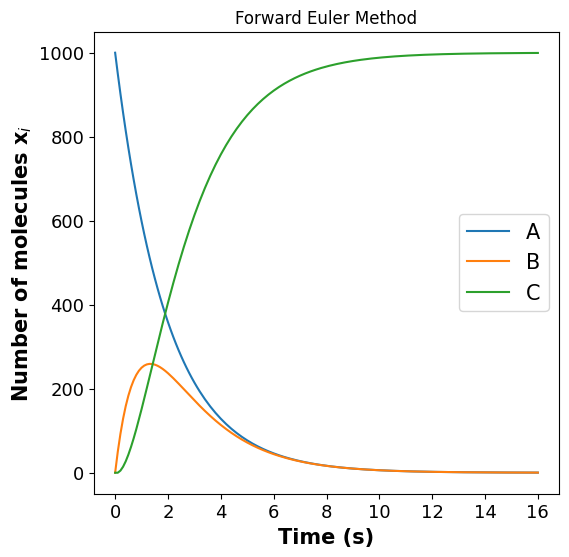

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters and initial conditions
k1 = 0.5
k2 = 1.0
xa0 = 1000.0  # Initial concentration of Ca
t_max = 16.0  # Maximum time
h = 0.1  # Time step

# Create arrays to store the results
t_values = np.arange(0, t_max + h, h)
Ca_values = [xa0]  # Initial value
Cb_values = [0.0]  # Initial value
Cc_values = [0.0]  # Initial value

# Numerically solve the differential equations using Forward Euler Method

### BEGIN SOLUTION ###
for t in t_values[:-1]:
    Ca_next = Ca_values[-1] - k1 * Ca_values[-1] * h
    Cb_next = Cb_values[-1] + (k1 * Ca_values[-1] - k2 * Cb_values[-1]) * h
    Cc_next = Cc_values[-1] + k2 * Cb_values[-1] * h

    # Print intermediate results
    print("\nt =", t)
    print("Ca =", Ca_next)
    print("Cb =", Cb_next)
    print("Cc =", Cc_next)

    Ca_values.append(Ca_next)
    Cb_values.append(Cb_next)
    Cc_values.append(Cc_next)
### END SOLUTION ###

# Plot the concentration profiles
fig = plt.figure(figsize=(6, 6))
plt.plot(t_values, Ca_values, label=r"A")
plt.plot(t_values, Cb_values, label=r"B")
plt.plot(t_values, Cc_values, label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)
plt.title('Forward Euler Method')
plt.show()


## 3b-1.2 Crank-Nicolson (Trapezoid Rule)

Alternatively, the Trapezoid Rule is a numerical method used to approximate the solutions of ordinary differential equations (ODEs). It is a widely used method that provides a straightforward approach to solving ODEs when an exact analytical solution is not available.

It also approximates the solution to a first-order ordinary differential equation of the form:

\begin{equation}
\frac{dy}{dx} = f(x, y)
\end{equation}

The Trapezoid Rule also operates through an iterative approach that discretizes the continuous ODE into discrete steps by using the following formula to update the solution at each step:

\begin{equation}
y_{n+1} = y_n + \frac{h}{2} \left[f(x_n, y_n) + f(x_{n+1}, y_{n+1})\right]
\end{equation}

In this formula:

$y_{n+1}$ is the new approximation of the solution at the next step.

$y_n$ is the previous approximation of the solution at the current step.

$h$ is the step size, representing the size of the interval over which the solution is approximated.

$x_n$ is the current value of the independent variable at the nth step.

$f(x_n, y_n)$ and $f(x_{n+1}, y_{n+1})$ represent the rate of change of y at the current point $(x_n, y_n)$ and the predicted point $(x_{n+1}, y_{n+1})$, respectively.

**Now, implement the found differential equations into the Crank-Nicolson (Trapezoid Rule) to find and plot the  numerically solution.**


t = 0.1
Ca = 951.25
Cb = 46.25
Cc = 2.5

t = 0.2
Ca = 904.8765625
Cb = 85.8515625
Cc = 9.271875000000001

t = 0.30000000000000004
Ca = 860.763830078125
Cb = 119.54620507812501
Cc = 19.689964843750005

t = 0.4
Ca = 818.8015933618165
Cb = 147.9996427368164
Cc = 33.198763901367194

t = 0.5
Ca = 778.8850156854279
Cb = 171.80925036980287
Cc = 49.305733944769294

t = 0.6000000000000001
Ca = 740.9143711707633
Cb = 191.51080356012264
Cc = 67.57482526911414

t = 0.7000000000000001
Ca = 704.7947955761886
Cb = 207.58456688855878
Cc = 87.62063753525271

t = 0.8
Ca = 670.4360492918494
Cb = 220.4607923295444
Cc = 109.10315837860627

t = 0.9
Ca = 637.7522918888717
Cb = 230.52468433798572
Cc = 131.72302377314261

t = 1.0
Ca = 606.6618676592892
Cb = 238.1208828257374
Cc = 155.21724951497345

t = 1.1
Ca = 577.0871016108989
Cb = 243.55751033653448
Cc = 179.35538805256672

t = 1.2000000000000002
Ca = 548.9541054073676
Cb = 247.10982530406778
Cc = 203.93606928856474

t = 1.3
Ca = 522.1925927687585
Cb = 24

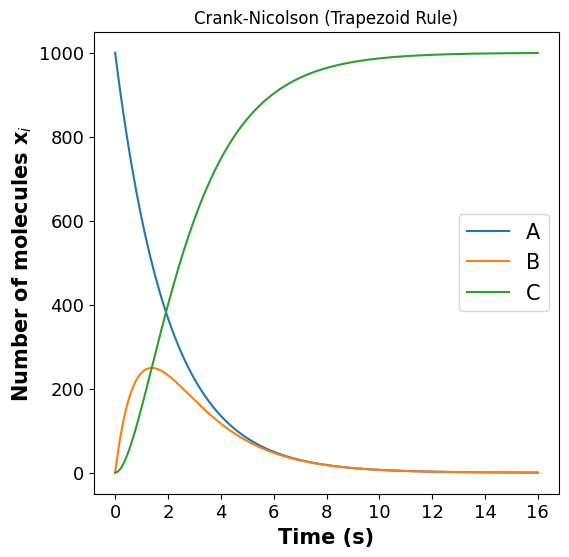

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters and initial conditions
k1 = 0.5
k2 = 1.0
xa0 = 1000.0  # Initial concentration of Ca
t_max = 16.0  # Maximum time
dt = 0.1  # Time step

# Define the rate equations
RHS_Ca = lambda Ca, Cb, t: -k1 * Ca
RHS_Cb = lambda Ca, Cb, t: k1 * Ca - k2 * Cb
RHS_Cc = lambda Cb, t: k2 * Cb

# Function to perform Crank-Nicolson method
def crank_nicolson(RHS_Ca, RHS_Cb, RHS_Cc, Ca0, Cb0, Cc0, dt, numsteps, LOUD=False):
    numsteps = int(numsteps)
    Ca = np.zeros(numsteps+1)
    Cb = np.zeros(numsteps+1)
    Cc = np.zeros(numsteps+1)
    t = np.arange(numsteps+1) * dt
    Ca[0] = Ca0
    Cb[0] = Cb0
    Cc[0] = Cc0
    for n in range(1, numsteps+1):
        if LOUD:
            print("\nt =", t[n])

        # Crank-Nicolson Method
### BEGIN SOLUTION ###
        Ca_half = Ca[n-1] + 0.5 * dt * RHS_Ca(Ca[n-1], Cb[n-1], t[n])
        Cb_half = Cb[n-1] + 0.5 * dt * RHS_Cb(Ca[n-1], Cb[n-1], t[n])
        Cc_half = Cc[n-1] + 0.5 * dt * RHS_Cc(Cb[n-1], t[n])

        Ca[n] = Ca[n-1] + dt * RHS_Ca(Ca_half, Cb_half, t[n] + 0.5 * dt)
        Cb[n] = Cb[n-1] + dt * RHS_Cb(Ca_half, Cb_half, t[n] + 0.5 * dt)
        Cc[n] = Cc[n-1] + dt * RHS_Cc(Cb_half, t[n] + 0.5 * dt)

        if LOUD:
            print("Ca =", Ca[n])
            print("Cb =", Cb[n])
            print("Cc =", Cc[n])

    return t, Ca, Cb, Cc

# Perform the Crank-Nicolson method
t, Ca, Cb, Cc = crank_nicolson(RHS_Ca, RHS_Cb, RHS_Cc, xa0, 0.0, 0.0, dt, t_max / dt, True)
### END SOLUTION ###

# Plot the concentration profiles
fig = plt.figure(figsize=(6, 6))
plt.plot(t, Ca, label=r"A")
plt.plot(t, Cb, label=r"B")
plt.plot(t, Cc, label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)
plt.title('Crank-Nicolson (Trapezoid Rule)')
plt.show()

## 3b-1.3 The convergence difference between the Forward Euler Method and the Crank-Nicolson (Trapezoid Rule).

The convergence difference between the Forward Euler Method and the Trapezoid Rule it is defined by their order of convergence.

But **what is convergence?** In numerical methods, convergence refers to how quickly the numerical solution approaches the exact solution as you use smaller time steps.

The **Forward Euler Method** is a first-order method, which means its **convergence is linear**. This way, when you reduce the step size $h$ in the Euler Method, the error in the approximation decreases linearly. Therefore, the Forward Euler Method is relatively less accurate for solving ODEs.

Analogously the **Trapezoid Rule** is a second-order method, which means its **convergence is quadratic**.
This way, when you reduce the step size $h$ in the Trapezoid Rule, the error in the approximation decreases quadratically. This results in a **much faster convergence compared to the Euler Method.**

Now, go back to the respective Forward Euler Method and Crank-Nicolson (Trapezoid Rule) codes change the step size $h$, and observe the graphical difference in both cases. **After that, come back and describe in a few sentences the difference you observed.**

**Your Answer**

## 3c. Stochastic vs Deterministic Solution
Plot the stochastic solution and deterministic solution for the species profiles in the same plot starting with 1000 molecules of A. **Write a few sentences to explain what you observe.** Submit your answer on an attached pdf file.

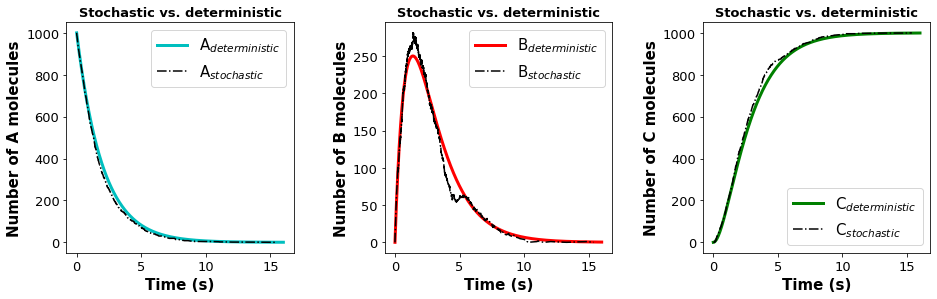

In [ ]:
### BEGIN SOLUTION ###

fig = plt.figure(figsize=(15, 4))

# Creating a subplot
plt.subplot(1, 3, 1)
plt.title("Stochastic vs. deterministic", fontsize=13, fontweight="bold")
plt.plot(t, X_a, "c", label=r"A$_{deterministic}$", linewidth=3)
plt.plot(time, xa, "k-.", label=r"A$_{stochastic}$")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of A molecules", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)

plt.subplot(1, 3, 2)
plt.title("Stochastic vs. deterministic", fontsize=13, fontweight="bold")
plt.plot(t, X_b, "r", label=r"B$_{deterministic}$", linewidth=3)
plt.plot(time, xb, "k-.", label=r"B$_{stochastic}$")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of B molecules", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)

plt.subplot(1, 3, 3)
plt.title("Stochastic vs. deterministic", fontsize=13, fontweight="bold")
plt.plot(t, X_c, "g", label=r"C$_{deterministic}$", linewidth=3)
plt.plot(time, xc, "k-.", label=r"C$_{stochastic}$")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of C molecules", fontsize=15, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=15)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### END SOLUTION ###

**Answer:** For N = 1000 molecules, we see that the profiles for the stochastic solution are similar to the deterministic solution with little noise. For even larger systems, the profiles will be even more accurate. Intuitively this is what we would expect; the random behavior becomes less important for large systems. In the next section, we will see that random behavior is important for small systems.

## 3d. Effect of number of molecules in stochastic simulation


**How does changing the starting number of molecules affect the reaction profiles?** Run the Gillespie function with A = 100 and A = 1000 molecules and create a subplot for the species profile. Submit this answer in a few sentences on an attached pdf file.

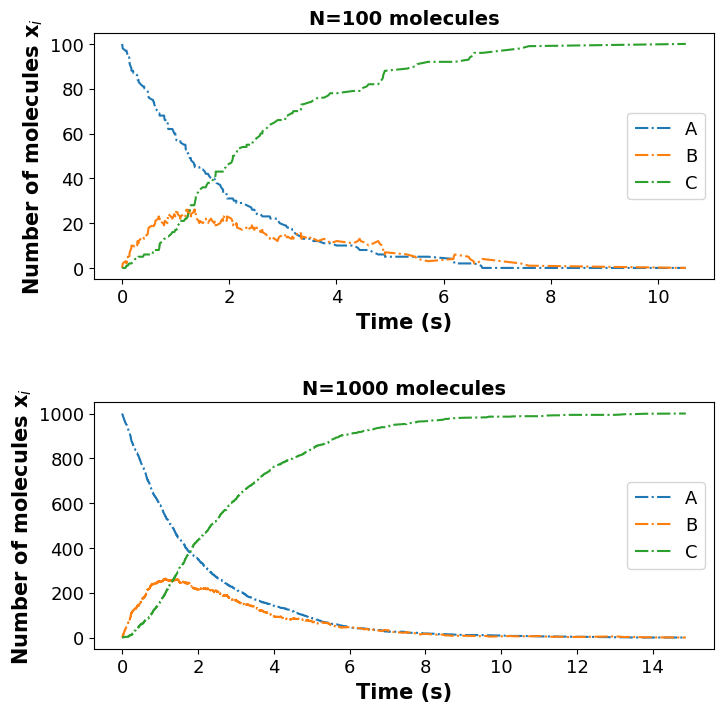

In [14]:
### BEGIN SOLUTION ###

# stochastic model for with 100 total molecules
x = gillespie(k1, k2, 100, 0, 0)
# stochastic model for with 1000 total molecules
y = gillespie(k1, k2, 1000, 0, 0)

### END SOLUTION ###

# creating a subplot for the two stochastic simulations
fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(x[0], x[1], "-.", label=r"A")
plt.plot(x[0], x[2], "-.", label=r"B")
plt.plot(x[0], x[3], "-.", label=r"C")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.title("N=100 molecules", fontsize=14, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=13)

plt.subplot(2, 1, 2)
plt.plot(y[0], y[1], "-.", label=r"A")
plt.plot(y[0], y[2], "-.", label=r"B")
plt.plot(y[0], y[3], "-.", label=r"C")
leg = plt.legend(fontsize=13)
plt.subplots_adjust(hspace=0.5)
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number of molecules x$_i$", fontsize=15, fontweight="bold")
plt.title("N=1000 molecules", fontsize=14, fontweight="bold")
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
leg = plt.legend(fontsize=13)

**Answer:** For N = 100 molecules, we can see more noise in the species profile compared to N = 1000 molecules, where the profile is smoother and closer to the analytical solution. This reinforces our idea that stochastic modeling is important if the system of interest is small.

## 4. Effect of rate constants k1 and k2
Plot reaction profiles using different rate constant values (using the same number of starting molecules. *Hint:* Change the value of one rate constant while keeping the other the same; this will make any changes obvious.


**How does changing the rate constant affect the reaction profiles?** Submit this answer in a few sentences on an attached pdf file.

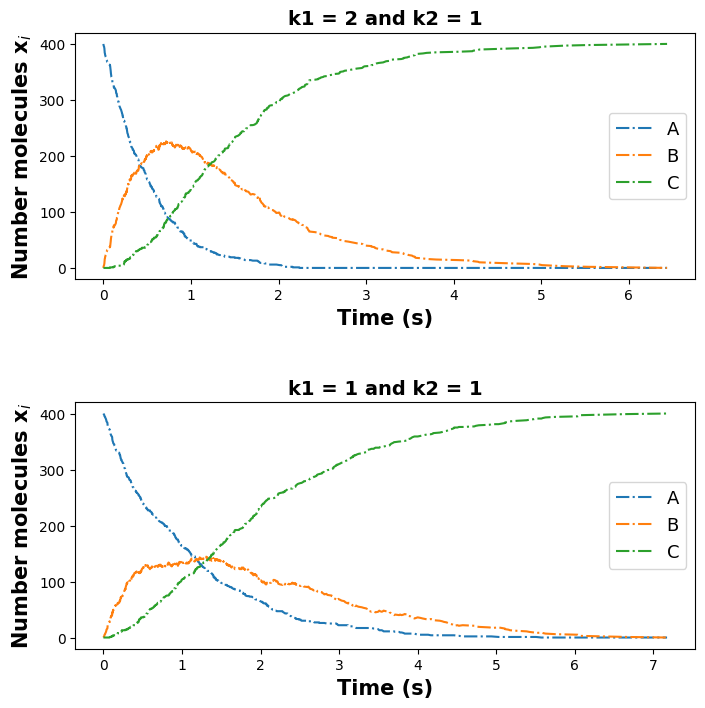

In [15]:
### BEGIN SOLUTION ###

# stochastic model with 400 total molecules, k1 = 2 and k2 = 1
e = gillespie(2, 1, 400, 0, 0)
# stochastic model with 400 total molecules, k1 = 1 and k2 = 1
f = gillespie(1, 1, 400, 0, 0)

### END SOLUTION ###

# creating a subplot for the two stochastic simulations
fig = plt.figure(figsize=(8, 8))

plt.subplot(2, 1, 1)
plt.plot(e[0], e[1], "-.", label=r"A")
plt.plot(e[0], e[2], "-.", label=r"B")
plt.plot(e[0], e[3], "-.", label=r"C")
leg = plt.legend(fontsize=15)
plt.title("k1 = 2 and k2 = 1", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number molecules x$_i$", fontsize=15, fontweight="bold")
leg = plt.legend(fontsize=13)

plt.subplot(2, 1, 2)
plt.plot(f[0], f[1], "-.", label=r"A")
plt.plot(f[0], f[2], "-.", label=r"B")
plt.plot(f[0], f[3], "-.", label=r"C")
plt.subplots_adjust(hspace=0.5)
leg = plt.legend(fontsize=15)
plt.title("k1 = 1 and k2 = 1", fontsize=14, fontweight="bold")
plt.xlabel("Time (s)", fontsize=15, fontweight="bold")
plt.ylabel("Number molecules x$_i$", fontsize=15, fontweight="bold")
leg = plt.legend(fontsize=13)

**Answer:** We see that for the top figure with higher k1, the maximum in B was reached faster and in a steeper way than the bottom figure with lower k1; this makes sense because a higher k1 means a higher probability of the first reaction, meaning faster conversion of A to B molecules. With the same logic, we can explain the decay in A and growth in C is also fast in the top figure compared to the bottom figure.

All of these characteristics would also be expected in the deterministic model. This exercise shows us the beauty of the Gillespie algorithm and how it can capture features of deterministic models while keeping the random behavior of the system into account.

## 5. Final Discussion

Through this project, we aimed to highlight the importance of stochastic (random) modeling (aka KMC simulations in the present time). We used the famous Gillespie algorithm for stochastic modeling and compared it to well-known deterministic reaction engineering models for a simple two irreversible reactions constant volume batch system. it is also presented in the notebook two different options to solve differential equations through numerical coding. Besides that, we showed that the stochastic solution has more noise in the profiles for smaller systems because of the random behavior of the molecules moving in the gas phase and colliding with each other. We showed that this random behavior becomes less critical for larger systems, and profiles were closer to deterministic models as captured by the Gillespie algorithm.